##### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

##### Use Pandas to import the data from epa-sea-level.csv.

In [2]:
df = pd.read_csv("epa-sea-level.csv", sep = ",")
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


##### Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.

Text(0.5, 1.0, 'Rise in Sea Level')

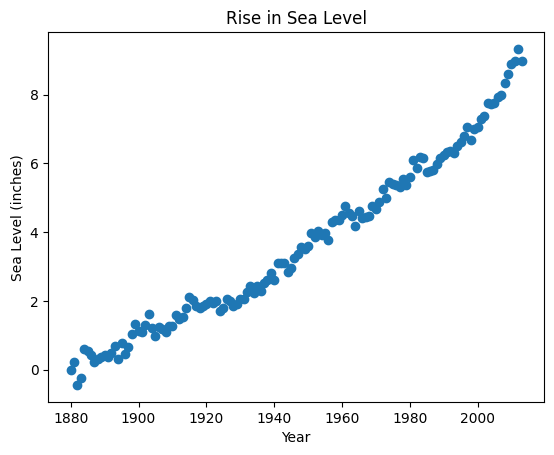

In [3]:
x = df["Year"]
y = df["CSIRO Adjusted Sea Level"]
fig , ax = plt.subplots()
plt.scatter(x,y)
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.set_title("Rise in Sea Level")

##### Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [4]:
# We obtain the slope and intercept of the line that best fits the data
res = linregress(x,y)
res.slope , res.intercept, res.rvalue

(0.06304458401213482, -119.06594196773983, 0.9847571311825853)

In [5]:
# Mathematically. We create a dataframe
df_math = df[["Year", "CSIRO Adjusted Sea Level"]].copy()
df_math.rename(columns = {"Year" : "x", "CSIRO Adjusted Sea Level": "y"}, inplace = True)
df_math["x**2"] = df_math["x"]**2
df_math["y**2"] = df_math["y"]**2
df_math["x*y"] = df_math["x"]*df_math["y"]
df_math

,x,y,x**2,y**2,x*y
0,1880,0.000000,3534400,0.000000,0.000000
1,1881,0.220472,3538161,0.048608,414.708662
2,1882,-0.440945,3541924,0.194432,-829.858266
3,1883,-0.232283,3545689,0.053956,-437.389763
4,1884,0.590551,3549456,0.348751,1112.598425
...,...,...,...,...,...
129,2009,8.586614,4036081,73.729943,17250.507855
130,2010,8.901575,4040100,79.238034,17892.165336
131,2011,8.964567,4044121,80.363460,18027.744076
132,2012,9.326772,4048144,86.988669,18765.464548


In [6]:
# Let's calculate the intercept
intercepto = (df_math["x*y"].sum() - (df_math["x"].sum() * df_math["y"].sum()/df_math.shape[0])) / (df_math["x**2"].sum() - (df_math["x"].sum()**2 / df_math.shape[0]))
intercepto

0.06304458401213375

In [7]:
# Let's calculate the slope
corte_ordenada = df_math["y"].sum() /df_math.shape[0] - intercepto * df_math["x"].sum() /df_math.shape[0]
corte_ordenada

-119.06594196773776

In [8]:
# Let's calculate the correlation coefficient
r_xy = (df_math.shape[0] * df_math["x*y"].sum() - df_math["x"].sum() * df_math["y"].sum()) / ((df_math.shape[0] * df_math["x**2"].sum() - df_math["x"].sum()**2)**(1/2) * (df_math.shape[0] * df_math["y**2"].sum() - df_math["y"].sum()**2)**(1/2))
r_xy

0.9847571311825671

Text(0.5, 1.0, 'Rise in Sea Level')

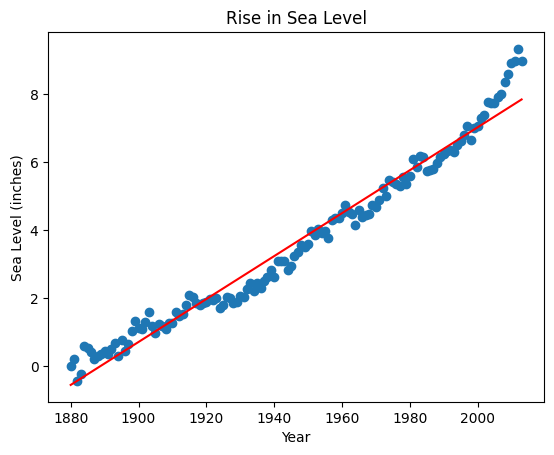

In [9]:
# We plot both the scatter points and the line that fits the most
ypredic1 = intercepto * x + corte_ordenada
fig , ax = plt.subplots()
plt.scatter(x,y)
plt.plot(x, ypredic1, "r")
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.set_title("Rise in Sea Level")

Text(0.5, 1.0, 'Rise in Sea Level')

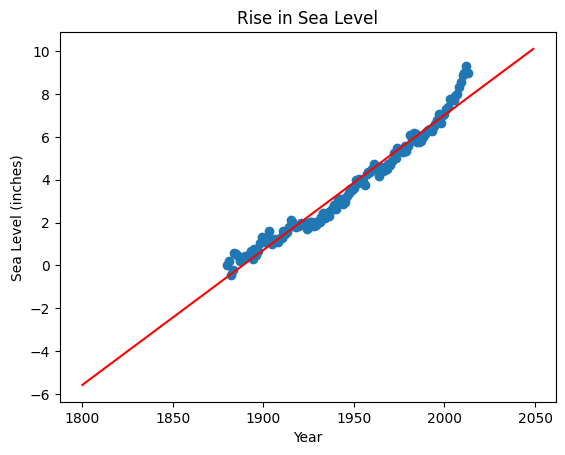

In [10]:
# We plot both the dispersion points and the line of the greatest adjustment until the year 2050
xpredic1 = pd.Series(i for i in range(1800,2050))
ypredic1 = intercepto * xpredic1 + corte_ordenada
fig , ax = plt.subplots()
plt.scatter(x,y)
plt.plot(xpredic1, ypredic1, "r")
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.set_title("Rise in Sea Level")

##### Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

In [11]:
# We take data from the year 2000
df2 = df[df["Year"] >= 2000]
x1 = df2["Year"]
y1 = df2["CSIRO Adjusted Sea Level"]
res = linregress(x1, y1)
res.slope, res.intercept, res.rvalue

(0.1664272733318682, -325.7934668059649, 0.976287571614062)

In [12]:
# Mathematically. We create a dataframe
df_math_2000 = df_math[df_math["x"] >= 2000]
df_math_2000

,x,y,x**2,y**2,x*y
120,2000,7.062992,4000000,49.885858,14125.984238
121,2001,7.287402,4004001,53.106222,14582.090536
122,2002,7.381890,4008004,54.492296,14778.543292
123,2003,7.759843,4012009,60.215156,15542.964552
124,2004,7.740157,4016016,59.910038,15511.275574
125,2005,7.744094,4020025,59.970999,15526.909432
126,2006,7.917323,4024036,62.684001,15882.149591
127,2007,7.996063,4028049,63.937023,16048.098409
128,2008,8.350394,4032064,69.729075,16767.590534
129,2009,8.586614,4036081,73.729943,17250.507855


In [13]:
intercepto_2000 = (df_math_2000["x*y"].sum() - (df_math_2000["x"].sum() * df_math_2000["y"].sum()/df_math_2000.shape[0])) / (df_math_2000["x**2"].sum() - (df_math_2000["x"].sum()**2 / df_math_2000.shape[0]))
corte_ordenada_2000 = df_math_2000["y"].sum() /df_math_2000.shape[0] - intercepto_2000 * df_math_2000["x"].sum() /df_math_2000.shape[0]
r_xy_2000 = (df_math_2000.shape[0] * df_math_2000["x*y"].sum() - df_math_2000["x"].sum() * df_math_2000["y"].sum()) / ((df_math_2000.shape[0] * df_math_2000["x**2"].sum() - df_math_2000["x"].sum()**2)**(1/2) * (df_math_2000.shape[0] * df_math_2000["y**2"].sum() - df_math_2000["y"].sum()**2)**(1/2))
intercepto_2000, corte_ordenada_2000, r_xy_2000

(0.16642727333205434, -325.7934668063385, 0.9762875716152412)

Text(0.5, 1.0, 'Rise in Sea Level')

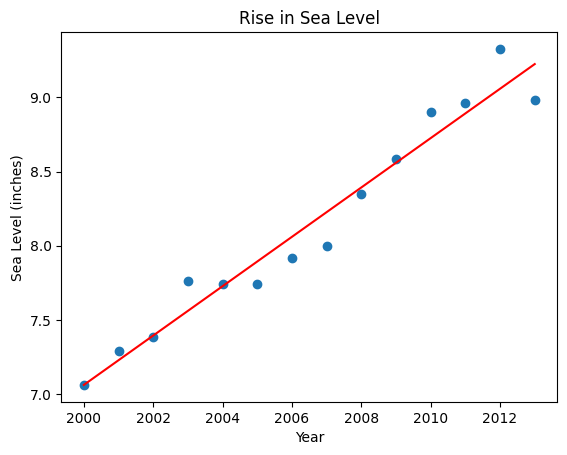

In [14]:
# We plot both the scatter points and the line that fits the most
x = df_math_2000["x"]
y = df_math_2000["y"]
ypredic1 = intercepto_2000 * x + corte_ordenada_2000
fig , ax = plt.subplots()
plt.scatter(x,y)
plt.plot(x, ypredic1, "r")
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.set_title("Rise in Sea Level")

Text(0.5, 1.0, 'Rise in Sea Level')

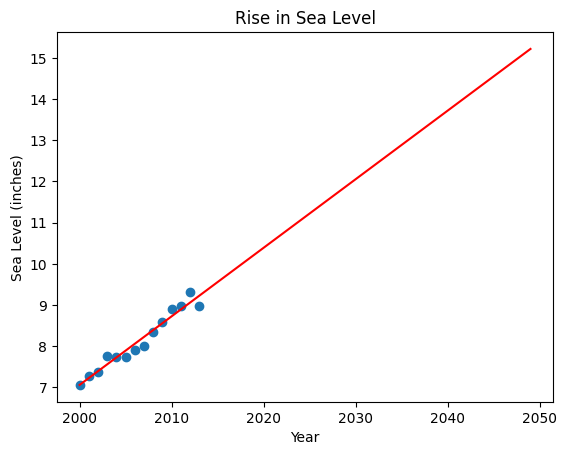

In [15]:
# We plot both the dispersion points and the line of the greatest adjustment until the year 2050
xpredic1 = pd.Series(i for i in range(2000,2050))
ypredic1 = intercepto_2000 * xpredic1 + corte_ordenada_2000
fig , ax = plt.subplots()
plt.scatter(x,y)
plt.plot(xpredic1, ypredic1, "r")
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.set_title("Rise in Sea Level")